Raw dataset

In [2]:
import os
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
import mat73

In [6]:
gt_path = "/home/swhong/01_NAFNet/AIISP2024/ValidationGtBlocksSrgb.mat"
gt = sio.loadmat(gt_path)
gt_images = gt['ValidationGtBlocksSrgb']
_shape = gt_images.shape
gt_images = gt_images.reshape(-1, *_shape[2:])

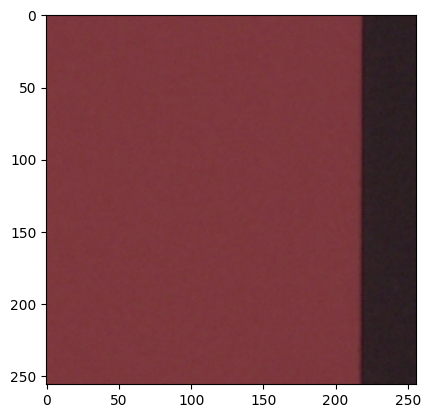

In [7]:
plt.imshow(gt_images[0])

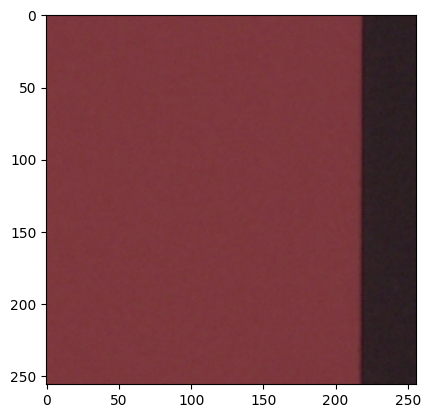

In [12]:
idx = 0
png_path = f'/home/swhong/SIDD_Validation_RGB/ValidationBlocksSrgb_{idx}.png'
with open(png_path, 'rb') as f:
  buf = f.read()
img_np = np.frombuffer(buf, np.uint8)
img = cv2.imdecode(img_np, cv2.IMREAD_UNCHANGED)
plt.imshow(img)

In [15]:
img[:10, :10, 0]

array([[127, 128, 128, 127, 125, 124, 124, 124, 125, 125],
       [126, 127, 127, 128, 126, 125, 125, 124, 124, 125],
       [124, 125, 126, 127, 126, 126, 125, 124, 125, 126],
       [124, 125, 126, 127, 126, 126, 126, 125, 125, 125],
       [126, 126, 125, 125, 125, 124, 125, 126, 126, 125],
       [126, 127, 126, 125, 124, 124, 125, 125, 125, 125],
       [126, 127, 125, 124, 124, 123, 123, 125, 125, 126],
       [126, 128, 125, 124, 125, 125, 124, 125, 125, 126],
       [125, 127, 125, 123, 124, 126, 125, 125, 125, 126],
       [125, 126, 126, 124, 124, 127, 126, 126, 126, 126]], dtype=uint8)

In [19]:
np.testing.assert_equal(img, gt_images[0])

In [4]:
from basicsr.utils import scandir_SIDD, scandir

c:\Users\swHong\anaconda3\envs\DLISP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
opt = {}
opt['n_thread'] = 12
opt['input_folder'] = 'D:/datasets/SIDD/SIDD_Medium/SIDD_Medium_Raw_Parts/SIDD_Medium_Raw/Data'
opt['save_folder'] = 'D:/datasets/SIDD/SIDD_Medium/SIDD_Medium_Raw_Parts/lq_raw_crops'
opt['crop_size'] = 512
opt['step'] = 384
opt['thresh_size'] = 0
opt['keywords'] = '_NOISY_RAW'


In [16]:
img_list = list(scandir_SIDD(Path(opt['input_folder']), keywords=opt['keywords'], recursive=True, full_path=True))

In [17]:
img_list[:3]

['D:\\datasets\\SIDD\\SIDD_Medium\\SIDD_Medium_Raw_Parts\\SIDD_Medium_Raw\\Data\\0001_001_S6_00100_00060_3200_L\\0001_NOISY_RAW_010.MAT',
 'D:\\datasets\\SIDD\\SIDD_Medium\\SIDD_Medium_Raw_Parts\\SIDD_Medium_Raw\\Data\\0001_001_S6_00100_00060_3200_L\\0001_NOISY_RAW_011.MAT',
 'D:\\datasets\\SIDD\\SIDD_Medium\\SIDD_Medium_Raw_Parts\\SIDD_Medium_Raw\\Data\\0002_001_S6_00100_00020_3200_N\\0002_NOISY_RAW_010.MAT']

In [18]:
print(os.path.basename(img_list[0]))
img_name, extension = os.path.splitext(os.path.basename(img_list[0]))
print(img_name, extension)
img_name = img_name.replace(opt['keywords'], '')
print(img_name)
img = mat73.loadmat(img_list[0])

0001_NOISY_RAW_010.MAT
0001_NOISY_RAW_010 .MAT
0001_010


In [19]:
img.keys()

dict_keys(['x'])

In [21]:
np.max(img['x']), np.min(img['x'])

(0.1534374, 0.0)

(3000, 5328)


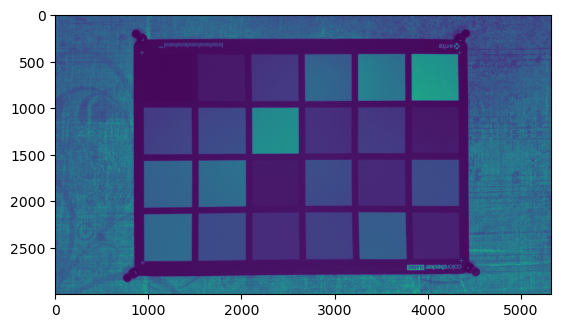

In [46]:
print(img['x'].shape)
plt.imshow(img['x'])

In [47]:
img['x'].dtype

dtype('<f4')

In [22]:
cv2.imwrite('test.png', img['x'][:512, :512])

True

In [29]:
crop_path = Path(opt['input_folder']).parents[1].joinpath('lq_raw_crops')
img_list = list(scandir(crop_path))
print(img_list[:3])

['0001_010_s001.raw', '0001_010_s002.raw', '0001_010_s003.raw']


(512, 512)
[[0.03515783 0.02733769 0.03515783 ... 0.01756252 0.03711286 0.02049507]
 [0.02733769 0.03906789 0.03320279 ... 0.04688803 0.01365245 0.03320279]
 [0.0566632  0.03027024 0.0507981  ... 0.0224501  0.03320279 0.01560748]
 ...
 [0.02049507 0.04395548 0.02538265 ... 0.05470817 0.02342762 0.05275314]
 [0.04102293 0.02538265 0.04786555 ... 0.02733769 0.05177562 0.02538265]
 [0.016585   0.04884307 0.01365245 ... 0.0625283  0.01756252 0.05861824]]


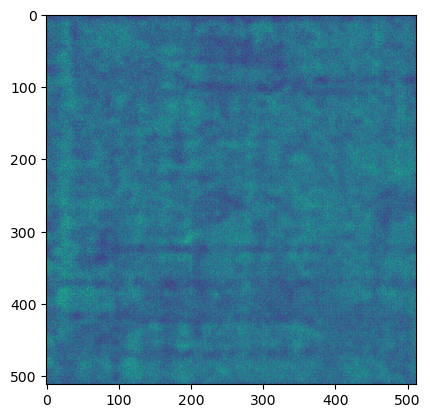

In [30]:
i = 0
f = crop_path.joinpath(img_list[i])
img = np.fromfile(str(f), dtype=np.float32).reshape(512, 512)
plt.imshow(img)
print(img.shape)
# img.shape
print(img)

In [53]:
_, img_byte = cv2.imencode('.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 0])

In [54]:
print(img_byte.nbytes)

263148


In [55]:
img_dec = np.frombuffer(img_byte, np.uint8)
img_dec = cv2.imdecode(img_dec, cv2.IMREAD_UNCHANGED)
# img_dec = img_dec.astype(np.float32)/255.

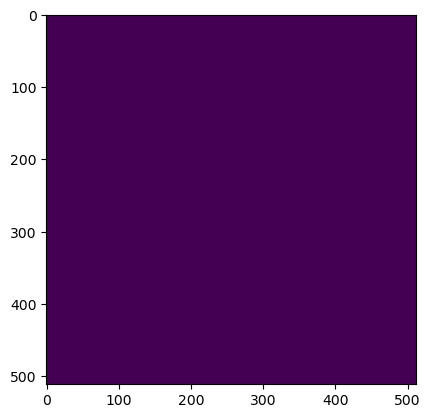

In [56]:
plt.imshow(img_dec)

In [63]:
save_folder = Path(opt['save_folder'])
print(save_folder)
folder_name = str(save_folder.name)+'.lmdb'
save_folder = save_folder.parents[0].joinpath(folder_name)
save_folder

D:\datasets\SIDD\SIDD_Medium\SIDD_Medium_Raw_Parts\lq_raw_crops


WindowsPath('D:/datasets/SIDD/SIDD_Medium/SIDD_Medium_Raw_Parts/lq_raw_crops.lmdb')

dataset test